# Monthly Run Forward and Backward to the JDF

In [1]:
#import required libraries
import arrow
import datetime
import numpy as np
import os
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
def calculate_all(section, allv, folder):
    final = {}
    mean = {}    
    filename = 'ariane_positions_quantitative.nc'
    fullfile = os.path.join('/ocean/rbeutel/MOAD/analysis-becca/Ariane/salish_manydays/',folder, filename)
    try:
        if os.stat(fullfile).st_size > 0:
            filegood = True
            data = xr.open_dataset(fullfile)
            final_section = data.variables['final_section'][:]
            final_transport = data.variables['final_transp'][:]
            transport = np.sum(np.where(final_section == section, final_transport, 0)) 
            #transport= the sum of particles through this section (m3/s), same as stats.txt summary once divided by 24
            for variable in allv:
                #this loop calculates the mean values shown in stats.txt final state tables
                if variable == 'final_age':
                    scale = 86400. # convert from seconds to days
                else:
                    scale = 1.
                final[variable] = data.variables[variable][:]/scale
                mean[variable] = np.sum(np.where(final_section == section, final_transport*final[variable], 0))/transport
        else:
            filegood = False
            transport = float('NaN')
            print ("empty file")
    except OSError:
        filegood = False
        transport = float('NaN')
        print ('Missing Data')
    return filegood, transport/24., mean

In [3]:
def get_data_all(start, endtime, section, allv, folder): 
    #pretty sure the only difference between this and calculate_all is that this one seperates into days (susan wants me to do for whole month)
    timerange = arrow.Arrow.range('day', start, endtime)
    length = (endtime-start).days + 1
    transport = np.zeros(length)
    mean = {}
    for variable in allv:
        mean[variable] = np.zeros(length)
    time = []
    for i, r in enumerate(timerange):
        dir1 = r.format('DDMMMYY').lower()
#        print (dir1)
        filegood, transport[i], meanday = calculate_all(section, allv, folder)
        for variable in allv:
            if filegood:
                mean[variable][i] = meanday[variable]
            else:
                mean[variable][i] = float('NaN')
        time.append(r.datetime)
    return transport[0], mean['final_salt'][0], mean['final_temp'][0]

In [4]:
mar_for = ['haro_forward_01mar19','rosario_forward_01mar19','sanjuan_forward_01mar19','Admiralty_forward_01mar19']
mar_back =['haro_backward_01mar19','rosario_backward_01mar19','sanjuan_backward_01mar19','Admiralty_backward_01mar19']
sep_for = ['haro_forward_01sep19','rosario_forward_01sep19','sanjuan_forward_01sep19','Admiralty_forward_01sep19']
sep_back = ['haro_backward_01sep19','rosario_backward_01sep19','sanjuan_backward_01sep19','Admiralty_backward_01sep19']

allv = ['final_age', 'final_depth', 'final_salt', 'final_temp', 'final_lon', 
        'init_depth', 'init_salt', 'init_temp', 'init_lat']
section = 6 #Jordan River is always section 6 in every run

In [5]:
start_mar = datetime.datetime(2019, 3, 1) #first full day
end_mar = datetime.datetime(2019, 3, 30) #last full day

start_sep = datetime.datetime(2019, 9, 1) #first full day
end_sep = datetime.datetime(2019, 9, 30) #last full day

In [6]:
mar_for_temp = np.zeros(3)
mar_for_sal = np.zeros(3)
mar_for_trans = np.zeros(3)

mar_bac_temp = np.zeros(3)
mar_bac_sal = np.zeros(3)
mar_bac_trans = np.zeros(3)

sep_bac_temp = np.zeros(3)
sep_bac_sal = np.zeros(3)
sep_bac_trans = np.zeros(3)

sep_for_temp = np.zeros(3)
sep_for_sal = np.zeros(3)
sep_for_trans = np.zeros(3)

In [7]:
for i in range(len(mar_for_temp)):
    mar_for_trans[i], mar_for_sal[i], mar_for_temp[i] = get_data_all(start_mar, end_mar, section, allv, mar_for[i])
    mar_bac_trans[i], mar_bac_sal[i], mar_bac_temp[i] = get_data_all(start_mar, end_mar, section, allv, mar_back[i])
    
    sep_for_trans[i], sep_for_sal[i], sep_for_temp[i] = get_data_all(start_sep, end_sep, section, allv, sep_for[i])
    sep_bac_trans[i], sep_bac_sal[i], sep_bac_temp[i] = get_data_all(start_sep, end_sep, section, allv, sep_back[i])

Text(0, 0.5, 'Temperature (C$\\degree$)')

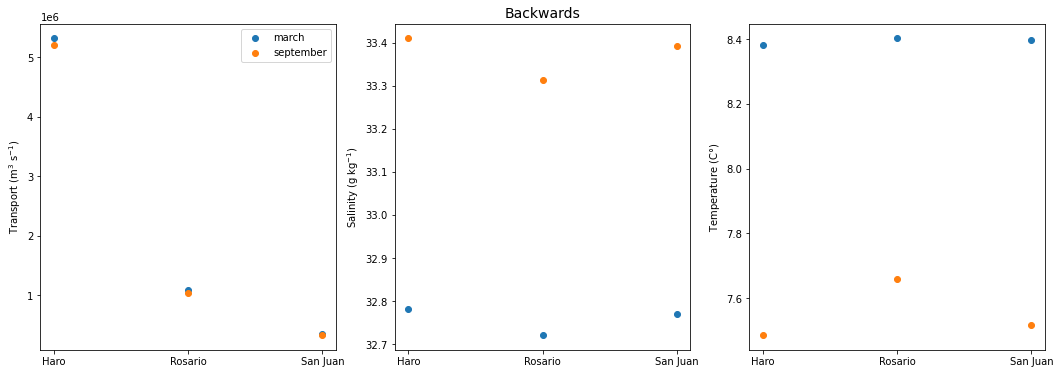

In [19]:
#backwards
x = ['Haro', 'Rosario', 'San Juan']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(x, mar_bac_trans, label = 'march')
axs[0].scatter(x, sep_bac_trans, label = 'september')
axs[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
axs[0].legend()

axs[1].scatter(x, mar_bac_sal, label = 'march salinity')
axs[1].scatter(x, sep_bac_sal, label = 'september salinity')
axs[1].set_ylabel('Salinity (g kg$^{-1}$)')
axs[1].set_title('Backwards', fontsize = 14)

axs[2].scatter(x, mar_bac_temp, label = 'march temperature')
axs[2].scatter(x, sep_bac_temp, label = 'september temperature')
axs[2].set_ylabel('Temperature (C$\degree$)')

Text(0, 0.5, 'Temperature (C$\\degree$)')

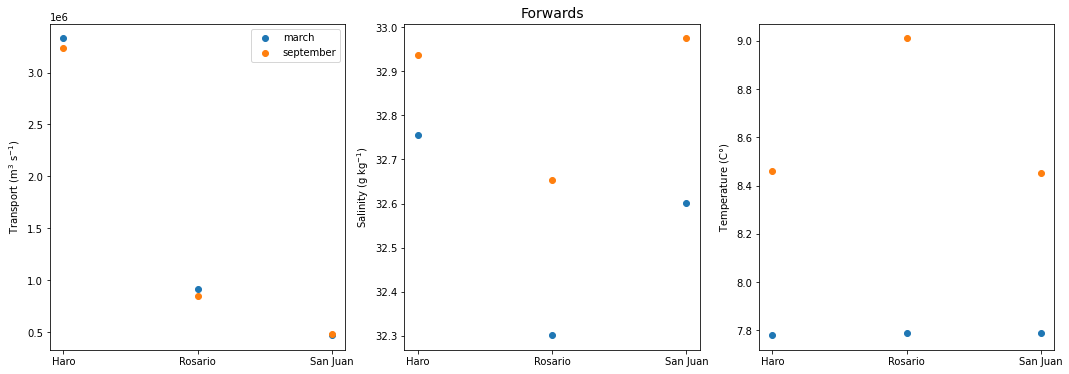

In [18]:
#forwards
x = ['Haro', 'Rosario', 'San Juan']
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].scatter(x, mar_for_trans, label = 'march')
axs[0].scatter(x, sep_for_trans, label = 'september')
axs[0].set_ylabel('Transport (m$^{3}$ s$^{-1}$)')
axs[0].legend()

axs[1].scatter(x, mar_for_sal, label = 'march salinity')
axs[1].scatter(x, sep_for_sal, label = 'september salinity')
axs[1].set_ylabel('Salinity (g kg$^{-1}$)')
axs[1].set_title('Forwards', fontsize = 14)

axs[2].scatter(x, mar_for_temp, label = 'march temperature')
axs[2].scatter(x, sep_for_temp, label = 'september temperature')
axs[2].set_ylabel('Temperature (C$\degree$)')